# Global Solution - IOT
- Celeste Mayumi
- Livia Mariana Lopes
- Luana Vieira

fonte do dataset:
https://www.kaggle.com/datasets/rodrigoberto/origindestination-sao-paulo/data?select=od_2017.csv

In [138]:
!pip install --quiet pandas numpy matplotlib seaborn scikit-learn openpyxl


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Analise de dados

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('od_2017.csv')

In [141]:
df.head()

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESTBICI,ID_ORDEM
0,1,36,333743,7394463,10001,1,15.416667,1,1,6092017,...,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,1
1,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,...,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,2
2,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,...,50.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,3
3,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,...,60.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,4
4,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,...,40.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5


In [142]:
df.describe()

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESTBICI,ID_ORDEM
count,183092.000000,183092.000000,183092.000000,1.830920e+05,1.830920e+05,183092.000000,183092.000000,183092.000000,183092.000000,1.830920e+05,...,157992.000000,157992.000000,157992.000000,51137.000000,40344.000000,1232.000000,49618.000000,1333.000000,1333.000000,183092.000000
mean,252.716765,31.151945,334452.099289,7.392567e+06,2.527834e+06,0.173940,218.698430,666.667287,1.034327,1.610487e+07,...,31.611050,9.759152,1.998329,1.738330,3.825525,95.757711,1.296304,1.579895,3.222806,91546.500000
std,152.750046,9.189423,15780.242016,1.000959e+04,1.527436e+06,0.379059,190.878334,747.768068,0.182068,8.947712e+06,...,30.724667,5.077647,0.813663,0.769251,1.128781,102.563184,1.213688,0.493761,1.363077,52854.252081
min,1.000000,1.000000,281337.000000,7.345593e+06,1.000100e+04,0.000000,2.140000,1.000000,1.000000,1.032018e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,104.000000,32.000000,324865.000000,7.387010e+06,1.041723e+06,0.000000,65.941176,45.000000,1.000000,8.082018e+06,...,10.000000,5.000000,1.000000,1.000000,3.000000,12.000000,1.000000,1.000000,3.000000,45773.750000
50%,257.000000,36.000000,331932.000000,7.393549e+06,2.570023e+06,0.000000,165.013713,450.000000,1.000000,1.609202e+07,...,20.000000,9.000000,2.000000,2.000000,4.000000,26.500000,1.000000,2.000000,3.000000,91546.500000
75%,389.000000,36.000000,343240.000000,7.398073e+06,3.890028e+06,0.000000,311.166667,1031.000000,1.000000,2.404202e+07,...,40.000000,16.000000,3.000000,2.000000,4.000000,180.000000,1.000000,2.000000,3.000000,137319.250000
max,517.000000,39.000000,414055.000000,7.429868e+06,5.171599e+06,1.000000,988.111111,9236.000000,2.000000,3.110202e+07,...,270.000000,17.000000,4.000000,5.000000,9.000000,600.000000,8.000000,2.000000,8.000000,183092.000000


In [143]:
df.shape

(183092, 126)

Fizemos uma pesquisa e escolhemos quais colunas do dataset fornecido seriam utilizadas, e criamos uma coluna target para a previsao 

In [144]:
colunas_essenciais = [
    'ZONA', 'MUNI_DOM', 'TOT_VIAG', 'N_VIAG', 'DURACAO'
]
df_filtered = df[colunas_essenciais]

In [145]:
df_filtered.head()

,ZONA,MUNI_DOM,TOT_VIAG,N_VIAG,DURACAO
0,1,36,2,1.0,10.0
1,1,36,2,2.0,10.0
2,1,36,3,1.0,50.0
3,1,36,3,2.0,60.0
4,1,36,3,3.0,40.0


In [146]:
def criar_target(row):
    if row['DURACAO'] > 20 or row['TOT_VIAG'] >= 3 or row['N_VIAG'] >= 3:
        return 1
    else:
        return 0 

df_filtered['TARGET'] = df.apply(criar_target, axis=1)


df_filtered[['ZONA', 'MUNI_DOM', 'TOT_VIAG', 'N_VIAG', 'DURACAO', 'TARGET']].head()

C:\Users\princ\AppData\Local\Temp\ipykernel_26356\1637328521.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TARGET'] = df.apply(criar_target, axis=1)


,ZONA,MUNI_DOM,TOT_VIAG,N_VIAG,DURACAO,TARGET
0,1,36,2,1.0,10.0,0
1,1,36,2,2.0,10.0,0
2,1,36,3,1.0,50.0,1
3,1,36,3,2.0,60.0,1
4,1,36,3,3.0,40.0,1


In [147]:
df_filtered.isnull().sum()

ZONA            0
MUNI_DOM        0
TOT_VIAG        0
N_VIAG      25100
DURACAO     25100
TARGET          0
dtype: int64

In [148]:
df_filtered['N_VIAG'] = df_filtered['N_VIAG'].fillna(df_filtered['N_VIAG'].mode()[0])
df_filtered['DURACAO'] = df_filtered['DURACAO'].fillna(df_filtered['DURACAO'].mode()[0])

C:\Users\princ\AppData\Local\Temp\ipykernel_26356\966106512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['N_VIAG'] = df_filtered['N_VIAG'].fillna(df_filtered['N_VIAG'].mode()[0])
C:\Users\princ\AppData\Local\Temp\ipykernel_26356\966106512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DURACAO'] = df_filtered['DURACAO'].fillna(df_filtered['DURACAO'].mode()[0])


In [152]:
df_filtered.isnull().sum()

ZONA        0
MUNI_DOM    0
TOT_VIAG    0
N_VIAG      0
DURACAO     0
TARGET      0
dtype: int64

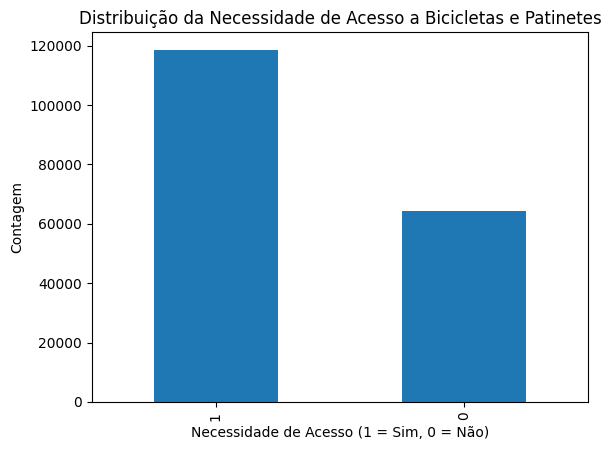

In [149]:
df_filtered['TARGET'].value_counts().plot(kind='bar', title='Distribuição da Necessidade de Acesso a Bicicletas e Patinetes')
plt.xlabel('Necessidade de Acesso (1 = Sim, 0 = Não)')
plt.ylabel('Contagem')
plt.show()

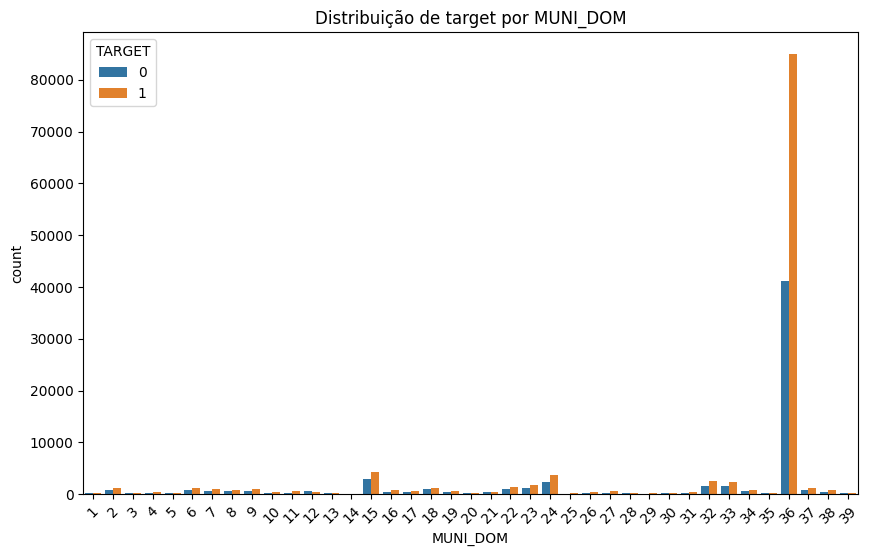

In [151]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='MUNI_DOM', hue='TARGET')
plt.title('Distribuição de target por MUNI_DOM')
plt.xticks(rotation=45)
plt.show()


Treinando o modelo

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [154]:
X = df_filtered[['ZONA', 'MUNI_DOM', 'TOT_VIAG', 'N_VIAG', 'DURACAO']]
y = df_filtered['TARGET']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [187]:
model = RandomForestClassifier()

In [188]:
model.fit(X_train, y_train)  


RandomForestClassifier()

In [189]:
y_pred = model.predict(X_test)

# Avaliando o modelo com a acurácia
print(f"Acurácia do Modelo: {accuracy_score(y_test, y_pred)}")



Acurácia do Modelo: 1.0
